In [ ]:
### Data from DES MOINES INTERNATIONAL AIRPORT, IA (1933-2024)
### https://www.ncei.noaa.gov/access/search/data-search/local-climatological-data-v2
### Coded by Jennalie Burroughs (University of Colorado)
### Last updated April 5th, 2025

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

In [5]:
#Simple way to read in the data :D! 
airport_name = "LCD_USW00014933" #name of the airport (as seen on the csv files)
years = range(1933, 2024) #all the years that you have downloaded

df_list = [pd.read_csv(f"{airport_name}_{year}.csv", low_memory=False) for year in years]
df = pd.concat(df_list, ignore_index=True)

print(df)
print(df.shape)

            STATION                 DATE  LATITUDE  LONGITUDE  ELEVATION  \
0       USW00014933  1933-03-01T00:00:00   41.5338    -93.653      291.7   
1       USW00014933  1933-03-01T01:00:00   41.5338    -93.653      291.7   
2       USW00014933  1933-03-01T02:00:00   41.5338    -93.653      291.7   
3       USW00014933  1933-03-01T03:00:00   41.5338    -93.653      291.7   
4       USW00014933  1933-03-01T06:00:00   41.5338    -93.653      291.7   
...             ...                  ...       ...        ...        ...   
935495  USW00014933  2023-12-31T21:00:00   41.5338    -93.653      291.7   
935496  USW00014933  2023-12-31T21:54:00   41.5338    -93.653      291.7   
935497  USW00014933  2023-12-31T22:54:00   41.5338    -93.653      291.7   
935498  USW00014933  2023-12-31T23:52:00   41.5338    -93.653      291.7   
935499  USW00014933  2023-12-31T23:54:00   41.5338    -93.653      291.7   

                                           NAME REPORT_TYPE  SOURCE  \
0       DES MOIN

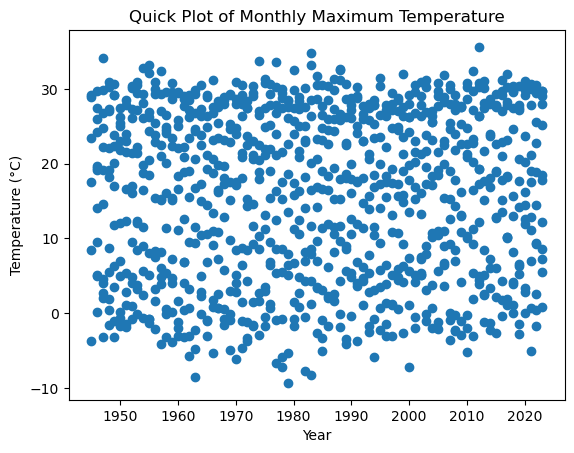

In [6]:
#Plot of Monthly Maximum Temperature to Find Missing Values or Outliers
df['Year'] = pd.to_datetime(df['DATE']).dt.year 
plt.scatter(df['Year'], df['MonthlyMaximumTemperature'])
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Quick Plot of Monthly Maximum Temperature")
plt.show()

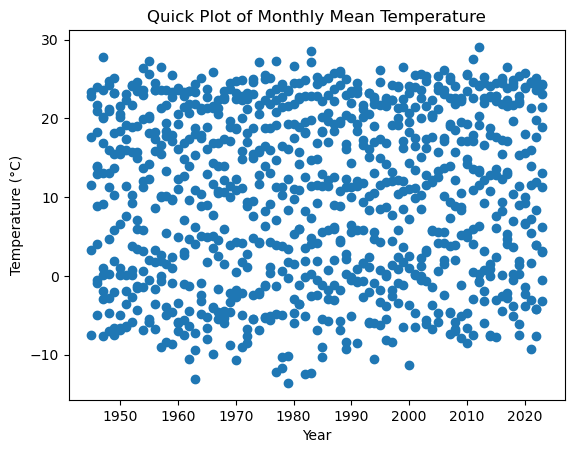

In [7]:
#Plot of Monthly Mean Temperature to Find Missing Values or Outliers
df['Year'] = pd.to_datetime(df['DATE']).dt.year 
plt.scatter(df['Year'], df['MonthlyMeanTemperature'])
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Quick Plot of Monthly Mean Temperature")
plt.show()

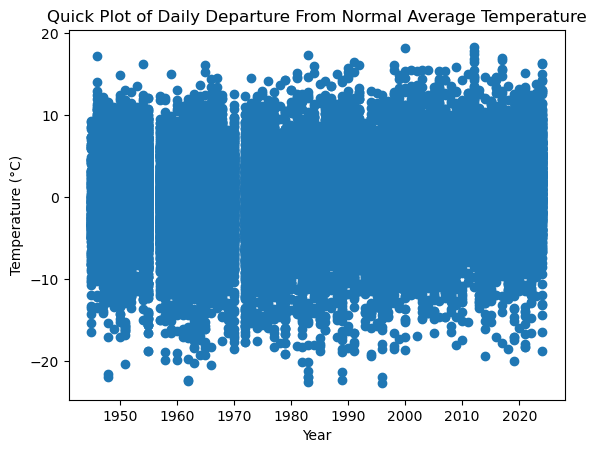

In [34]:
#Daily Departure From Normal Average Temp.
df['Year'] = pd.to_datetime(df['DATE']).dt.year 
plt.scatter(df['Year'], df['DailyDepartureFromNormalAverageTemperature'])
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Quick Plot of Daily Departure From Normal Average Temperature")
plt.show()

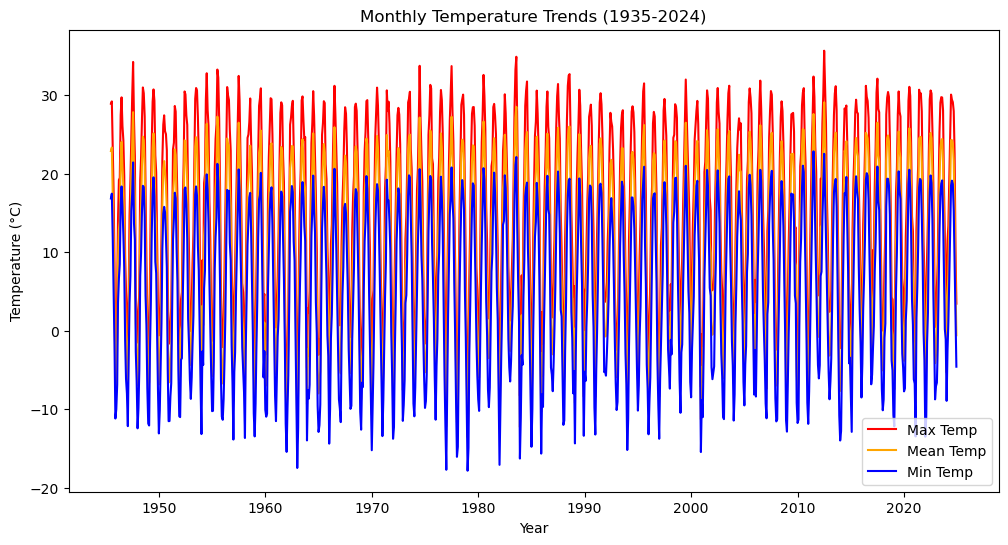

In [54]:
#ALL monthly temps included (°C)
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')

temp_data = df.groupby('YearMonth')[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

temp_data.index = temp_data.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Trends (1935-2024)")
plt.legend()
plt.show()

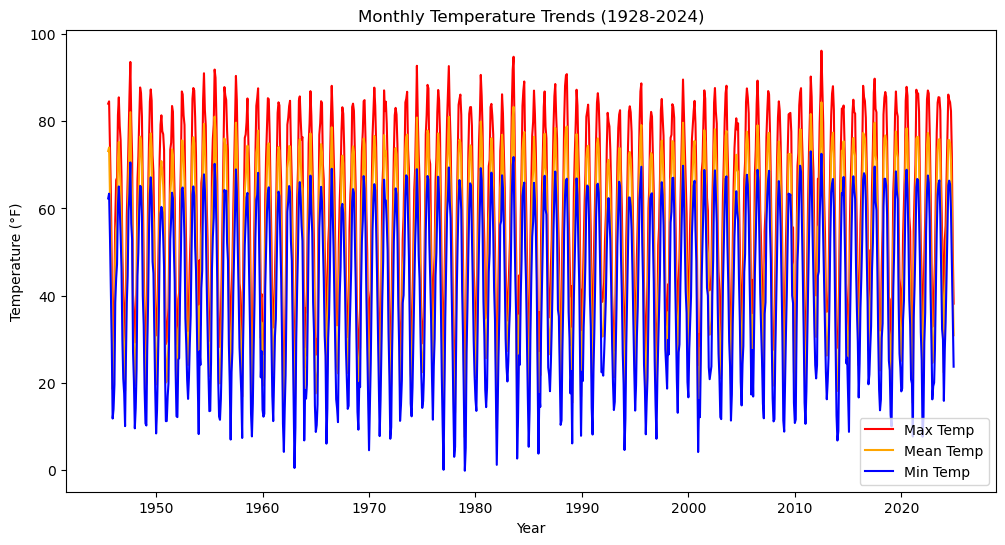

In [55]:
#ALL montly temps included (°F)
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')

temp_data = df.groupby('YearMonth')[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

temp_data.index = temp_data.index.to_timestamp()

#Conversion from °F to °C
temp_data['MonthlyMaximumTemperature'] = temp_data['MonthlyMaximumTemperature'] * 9/5 + 32
temp_data['MonthlyMeanTemperature'] = temp_data['MonthlyMeanTemperature'] * 9/5 + 32
temp_data['MonthlyMinimumTemperature'] = temp_data['MonthlyMinimumTemperature'] * 9/5 + 32

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.title("Monthly Temperature Trends (1928-2024)")
plt.legend()
plt.show()

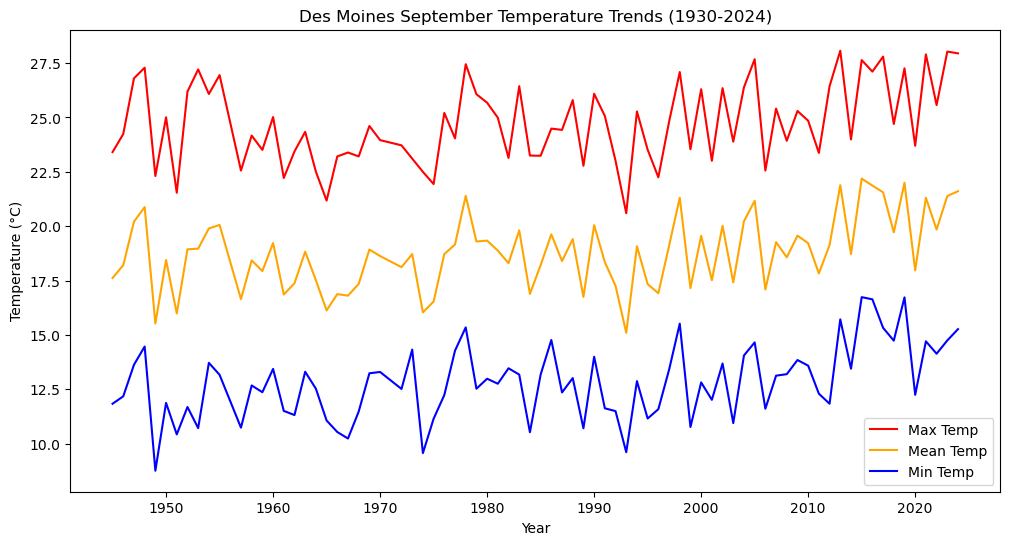

In [4]:
# Des Moines September Temperature Trends °C
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 9] #Filtering to only do the September Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Des Moines September Temperature Trends (1930-2024)")
plt.legend()
plt.show()

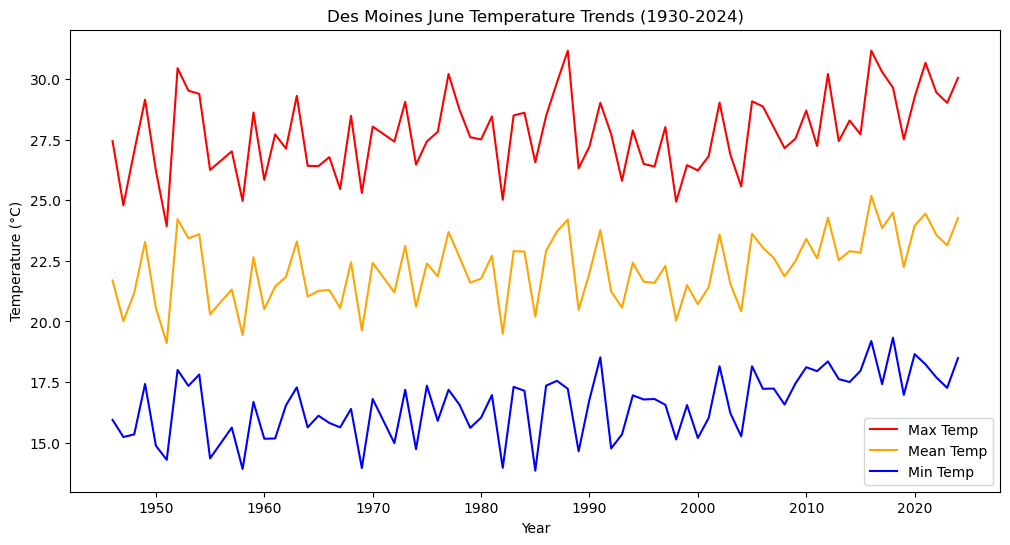

In [5]:
# Des Moines September Temperature Trends °F
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 6] #Filtering to only do the June Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Des Moines June Temperature Trends (1930-2024)")
plt.legend()
plt.show()

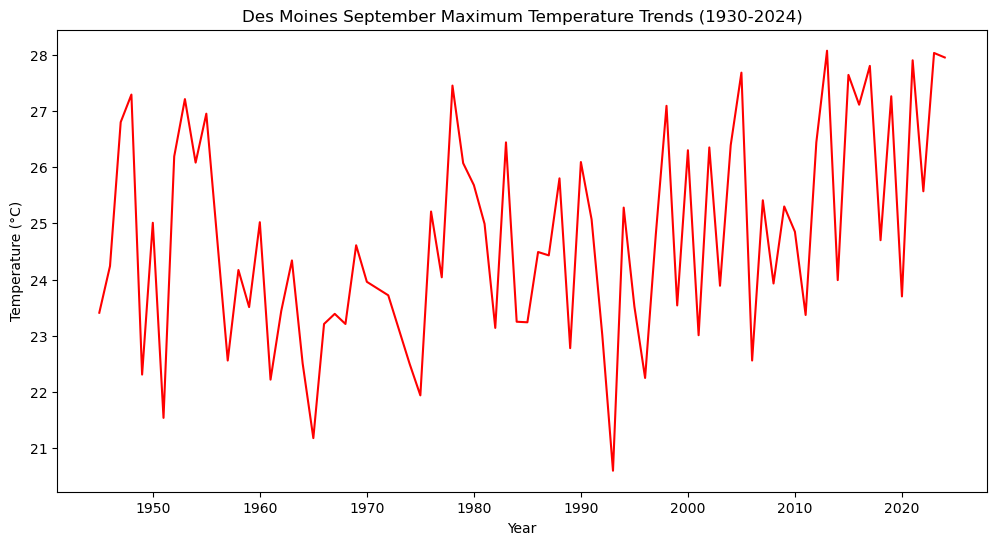

In [6]:
#Des Moines Max September
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 9] #Filtering to only do the September Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Des Moines September Maximum Temperature Trends (1930-2024)")
plt.show()

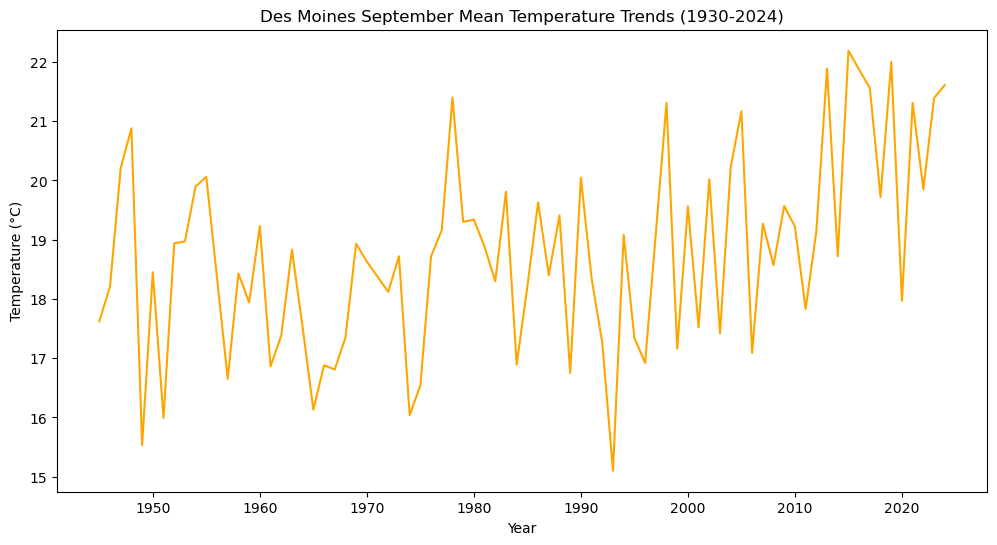

In [7]:
#Des Moines Mean September
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 9] #Filtering to only do the September Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Max Temp', color='orange')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Des Moines September Mean Temperature Trends (1930-2024)")
plt.show()

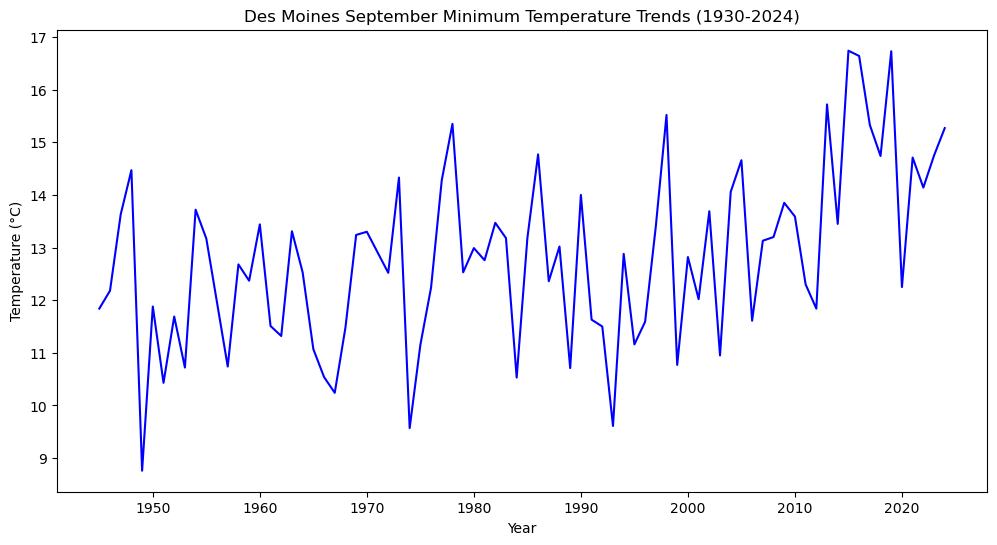

In [8]:
#Des Moines Minimum September
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 9] #Filtering to only do the September Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Max Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Des Moines September Minimum Temperature Trends (1930-2024)")
plt.show()

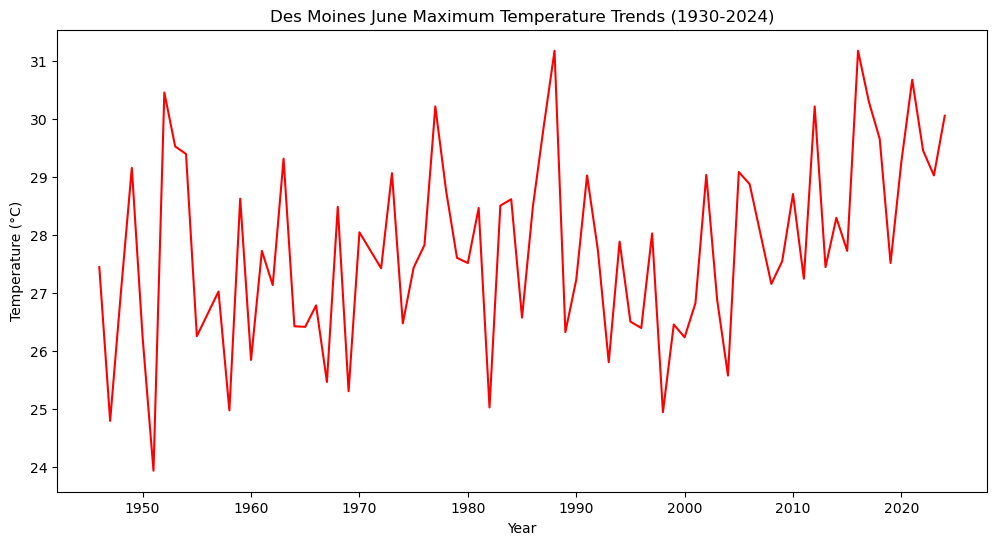

In [10]:
#Monthly Maximum Temp for June (1935-2024)
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 6] #Filtering to only do the September Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Des Moines June Maximum Temperature Trends (1930-2024)")
plt.show()

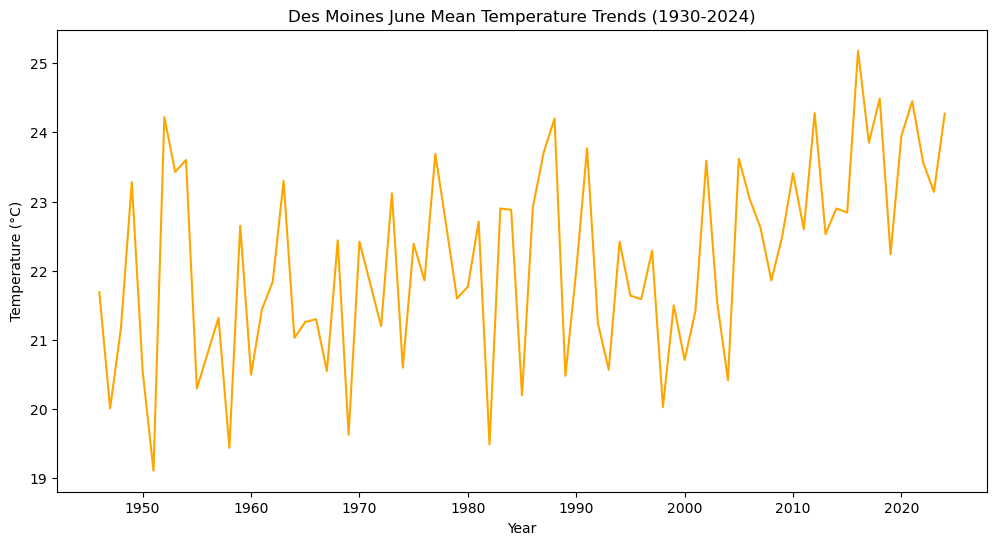

In [11]:
#Monthly Mean Temp for June (1935-2024)
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 6] #Filtering to only do the September Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Des Moines June Mean Temperature Trends (1930-2024)")
plt.show()

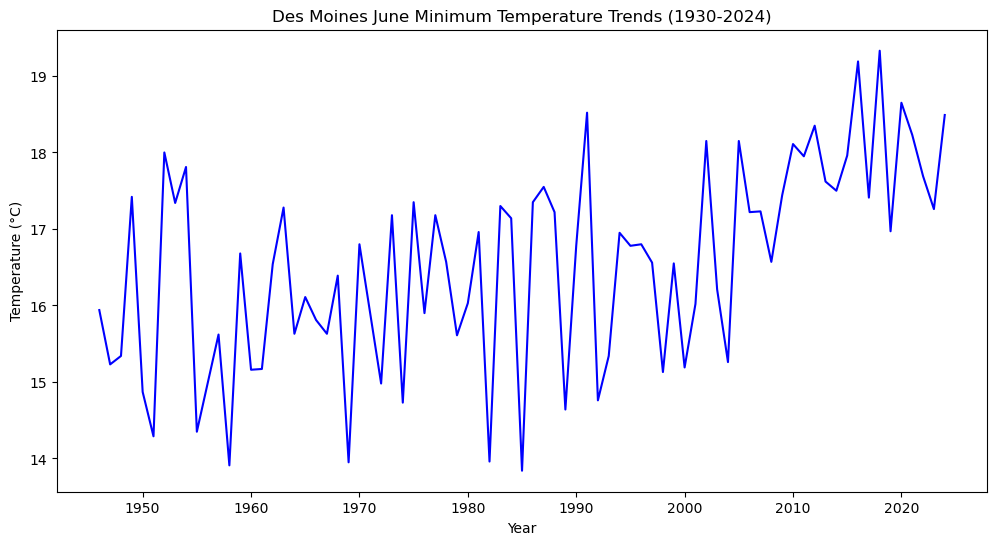

In [12]:
#Monthly Minimum Temp for June (1935-2024)
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 6] #Filtering to only do the June Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Des Moines June Minimum Temperature Trends (1930-2024)")
plt.show()